In [1]:
# Load the Pandas library and give it the short name 'pd'
# Load the defaultdict object from the collections library
# Load pyplot frm the matplotlib libaray and give it the short name 'plt'
# Load everything from the plotnine library
import pandas as pd  
from collections import defaultdict 
from matplotlib import pyplot as plt
from plotnine import *

ModuleNotFoundError: No module named 'plotnine'

In [2]:
# Load the licensed_premises_feb_2015_0_1.xlsx spreadsheet into a Pandas dataframe
df = pd.read_excel('licensed_premises_feb_2015_0_1.xlsx')

In [3]:
# Display the dataframe's shape
print (df.shape)

(800, 7)


In [4]:
# Our first report
report = "There are " + str(df.shape[0]) + " premises in the dataset."
print (report)

There are 800 premises in the dataset.


In [5]:
df.describe()

,ServiceTypeLabel,PremisesName,LocationText,PostCode,AlcoholSupply,OpeningHours,StatusLabel
count,800,800,800,57,800,414,800
unique,3,675,675,54,2,193,7
top,Premises licence,Tiger Tiger,Newcastle upon Tyne,NE1 6QG,True,Su 10:00:00-22:30:00,Issued
freq,569,17,25,2,424,105,361


In [6]:
df.describe(include='all')

,ServiceTypeLabel,PremisesName,LocationText,PostCode,AlcoholSupply,OpeningHours,StatusLabel
count,800,800,800,57,800,414,800
unique,3,675,675,54,2,193,7
top,Premises licence,Tiger Tiger,Newcastle upon Tyne,NE1 6QG,True,Su 10:00:00-22:30:00,Issued
freq,569,17,25,2,424,105,361


In [7]:
# Display the head
df.head()

,ServiceTypeLabel,PremisesName,LocationText,PostCode,AlcoholSupply,OpeningHours,StatusLabel
0,Temporary event notice,O'Neills,38 Neville Street,NaN,False,NaN,Withdrawn
1,Premises licence,Gosforth Bowling Club,"West Avenue,Gosforth",NE3 4ES,True,Su 12:00:00-22:30:00,Issued
2,Premises licence,Richard Granger Wines,"West Jesmond Station,Lyndhurst Avenue",NE2 3HH,True,Su 10:00:00-22:30:00,Issued
3,Premises licence,Forbuoys (Fawdon Post Office),3 Fawdon Park Road,NE3 2PE,True,Su 10:00:00-22:30:00,Surrendered
4,Premises licence,G K Foodstore,"28 - 29 Tyne View,Lemington",NE15 8RA,True,Su 10:00:00-22:30:00,Issued


In [9]:
# Display the tail
df.tail()

,ServiceTypeLabel,PremisesName,LocationText,PostCode,AlcoholSupply,OpeningHours,StatusLabel
795,Temporary event notice,NE6 Suite,"123 Scrogg Road,Newcastle upon Tyne",NaN,True,NaN,Refused
796,Premises licence,La Vita,"208 - 210 Heaton Road,Newcastle upon Tyne",NaN,False,"Mo-Sa 11:00:00-23:00:00,Mo-Sa 23:00:00-23:30:0...",Issued
797,Premises licence,Supernatural Restaurant,"15-17 Princess Square,Newcastle upon Tyne",NaN,True,Mo-Su 11:00:00-23:00:00,Issued
798,Premises licence,Alphabetti Theatre,"The Basement,New Bridge Street Project Space,1...",NaN,True,Mo-Su 11:00:00-23:00:00,Approved
799,Temporary event notice,Players Bar,"Unit 2,The Gate,Newgate Street,Newcastle upon ...",NaN,True,NaN,Refused


In [8]:
# Create a dictionary where the key of each entry is 'ServiceTypeLabel' (licence 
# type) and the value is a count of the premises in that category.

licence_counts = defaultdict(int) # Create empty dict
# A for loop to iterate over all the rows in df looking at the contents of the 
# 'ServiceTypeLabel' column. 
for licence in df.loc[:,'ServiceTypeLabel']:
  licence_counts[licence] +=1

# Display the dictionary 
licence_counts.items()

dict_items([('Temporary event notice', 205), ('Premises licence', 569), ('Club premises certificate', 26)])

In [9]:
licence_type = list(licence_counts.keys())
num = list(licence_counts.values())     

print ("List of licence types: ", licence_type)
print ("List of premises counts:",num)

List of licence types:  ['Temporary event notice', 'Premises licence', 'Club premises certificate']
List of premises counts: [205, 569, 26]


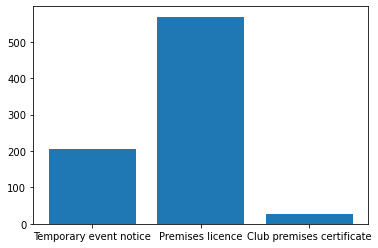

In [10]:
plt.bar(licence_type, num)
plt.show()

In [11]:
# Create a sorted list from the dictionary.
sorted_list = sorted(licence_counts.items())
licence_type=[licence[0] for licence in sorted_list] # create a list of all the first elements
num=[licence[1] for licence in sorted_list] # create a list of all the second elements
print(licence_type)
print(num)


['Club premises certificate', 'Premises licence', 'Temporary event notice']
[26, 569, 205]


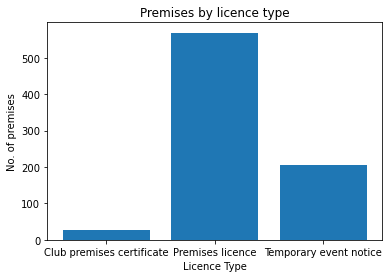

In [12]:
# Plot it
plt.xlabel("Licence Type")
plt.ylabel("No. of premises")
plt.title("Premises by licence type")
plt.bar(licence_type, num)
plt.show()

In [28]:
import operator
sorted_by_type = sorted(licence_counts.items(), key=operator.itemgetter(0))#ascending order
sorted_by_value = sorted(licence_counts.items(), key=operator.itemgetter(1),reverse=True)#descending order

print(sorted_by_type)
print(sorted_by_value)

[('Club premises certificate', 26), ('Premises licence', 569), ('Temporary event notice', 205)]
[('Premises licence', 569), ('Temporary event notice', 205), ('Club premises certificate', 26)]


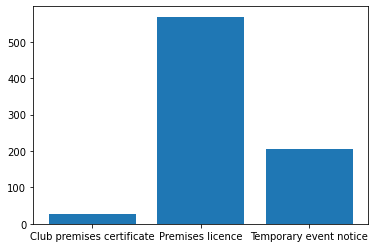

In [21]:
#Shortcuts: Let's use our new sorted dictionaries directly in our plot function. First, sorted by type:
plt.bar([licence[0] for licence in sorted_by_type],[licence[1] for licence in sorted_by_type])
plt.show()

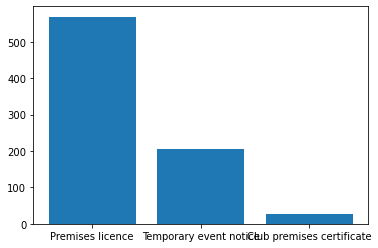

In [27]:
#sort by count
#descending order chart check with cell import operator 
plt.bar([licence[0] for licence in sorted_by_value],[licence[1] for licence in sorted_by_value])
plt.show()

In [29]:
status_counts = defaultdict(int) # Create empty dict
# A for loop to iterate over all the rows in df looking at the contents of the 
# 'StatusLabel' column. 
for status in df.loc[:,'StatusLabel']:
  status_counts[status] +=1

# Display the dictionary 
status_counts.items()

dict_items([('Withdrawn', 180), ('Issued', 361), ('Surrendered', 144), ('Revoked', 3), ('Refused', 92), ('Suspended', 18), ('Approved', 2)])

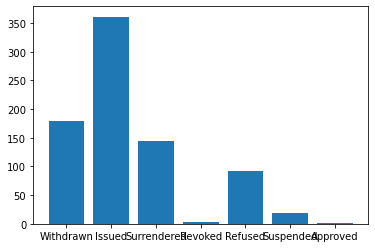

In [30]:
plt.bar(list(status_counts.keys()),list(status_counts.values()))
plt.show()